In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

BASE_URL = "http://127.0.0.1:8000"


In [10]:
ticker = "AAPL"

resp = requests.get(
    f"{BASE_URL}/features/earnings/bulk",
    params={
        "tickers": ticker,
        "start_date": "2024-01-01",
        "end_date": "2025-12-31",
    },
    timeout=20,
)

resp.raise_for_status()
data = resp.json()

rows = data.get("features", [])
len(rows), rows[:1]



(5,
 [{'ticker': 'AAPL',
   'call_date': '2024-01-31',
   'token_count': 47,
   'sentiment_mean': 0.0,
   'sentiment_std': 0.0,
   'uncertainty_score': 0.02127659574468085,
   'return_1d': 0.013340795329013451,
   'return_3d': 0.017787504359211562,
   'return_5d': 0.017787504359211562}])

In [11]:
rows = []

for call_date in earnings_dates:
    try:
        resp = requests.get(
            f"{BASE_URL}/features/earnings",
            params={"ticker": ticker, "call_date": call_date},
            timeout=10,
        )
        resp.raise_for_status()
        data = resp.json()

        # API returns: {"features": [ { ... } ]}
        features_list = data.get("features", [])
        if not features_list:
            print(f"No features returned for {ticker} {call_date}")
            continue

        row = features_list[0]
        rows.append(row)
        print(f"OK: {ticker} {call_date}")

    except Exception as e:
        print(f"Error for {ticker} {call_date}: {e}")

len(rows)


OK: AAPL 2024-01-31
OK: AAPL 2024-04-30
OK: AAPL 2024-07-30
OK: AAPL 2024-10-30
OK: AAPL 2025-01-28


5

In [12]:
df = pd.DataFrame(rows)
df


,ticker,call_date,token_count,sentiment_mean,sentiment_std,uncertainty_score,return_1d,return_3d,return_5d
0,AAPL,2024-01-31,47,0.000000,0.000000,0.021277,0.013341,0.017788,0.017788
1,AAPL,2024-04-30,43,0.016667,0.033333,0.023256,-0.006047,0.076616,0.066812
2,AAPL,2024-07-30,54,0.094484,0.073091,0.018519,0.014991,0.004845,-0.043556
3,AAPL,2024-10-30,49,0.014286,0.028571,0.020408,-0.018209,-0.035159,-0.035159
4,AAPL,2025-01-28,55,0.049234,0.122210,0.072727,0.004617,-0.009485,-0.043020


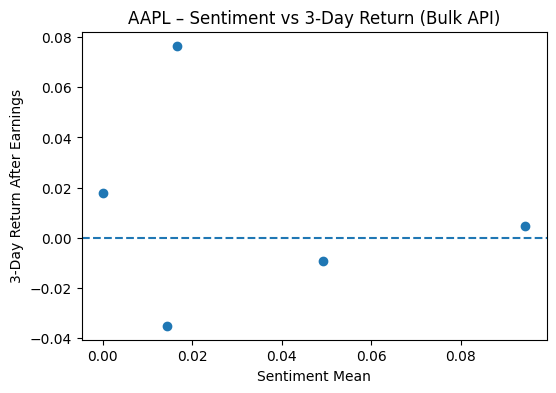

In [13]:
df_plot = df.dropna(subset=["return_3d"])

plt.figure(figsize=(6, 4))
plt.scatter(df_plot["sentiment_mean"], df_plot["return_3d"])
plt.axhline(0, linestyle="--")
plt.xlabel("Sentiment Mean")
plt.ylabel("3-Day Return After Earnings")
plt.title(f"{ticker} – Sentiment vs 3-Day Return (Bulk API)")
plt.show()
